# Programa de Ajuste Lineal por Mínimos Cuadrados

Este nb es genérico para realizar un ajuste no lineal. 

Vamos a usar el paquete optimizado curve.fit que se encuentra en la librería SciPy. Se pude consultar la documentación
en esta dirección web

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit


Importamos los paquetes necesarios

In [1]:
from numpy import *
import numpy as np

from numpy.linalg import *

import scipy.optimize as so

import matplotlib.pyplot as plt

%matplotlib inline

from IPython.display import display, Latex

import pandas as pd
pd.set_option('precision', 2)

### En esta celda introducimos nuestros datos $\{ x_i, y_i \}$, $i=1,...,n$

In [2]:
x=array([5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12,12.5,13,13.5,14,14.5,15,15.5,
         16.5,17,17.5,18,18.5,19,19.5,20,20.5,21,21.5,22,22.5,23,23.5,24,24.5,25,25.5,26,26.5,27,27.5,28,28.5,29,29.5,
         30,30.5,31,31.5,32,32.5,33])-5.5
nx=len(x)
display('nx1=%3.2i'% nx)


y=array([12.25,11,16.5,28,43.5,61.5,80.5,97.25,111,120.5,
         124.75,123.75,118,108.25,96,82,68.5,56.5,47.25,41.5,
         40,48.5,57,67.25,77.75,87.5,96,101.75,104.75,104.75,
         102,96.75,89.75,82,74,67,61.25,57.75,56.25,57.25,60.5,65,70.5,76.75,82.5,87.25,90,93.25,93.75,92.5,89.75,86.25,81.75,77.25,77])
ny=len(y)
display('ny1=%3.2i'% ny)

#the estimated type B error un y
uy=array([0.5]*nx) 

'nx1= 55'

'ny1= 55'

podemos visualizar nuestros datos como una tabla

In [3]:
datos = pd.DataFrame({'x': x, 'y': y , 'uy' : uy },index=arange(nx)+1)
display(datos)

,uy,x,y
1,0.5,0.0,12.25
2,0.5,0.5,11.00
3,0.5,1.0,16.50
4,0.5,1.5,28.00
5,0.5,2.0,43.50
6,0.5,2.5,61.50
7,0.5,3.0,80.50
8,0.5,3.5,97.25
9,0.5,4.0,111.00
10,0.5,4.5,120.50


### Definimos la función a ajustar

Esta será una función genérica $f(t, p_1,...,p_n)$ donde $t$ es el agrumento y $p_1,...,p_n$ una serie de parámetros.

por ejemplo, para una oscilación armónica amortiguada


$ y(t, \omega,\gamma,A,\phi,y_0) = y_0 + A e^{-\gamma t} cos(\omega t+\phi)$

Donde
 $\omega$ es la frecuencia angular,  $\gamma$ es el coeficiente de amortiguamiento, $A$ la amplitud initial, $\phi$ una fase inicial y $y_0$ la posición de equilibrio.

In [4]:
# definimos la función, el primer argumento es la variable independiente, y los que siguen son los parámetros.

def fun(t,w,gamma,A,phi,y0):
    y = y0+ A*np.exp(-gamma*t)*np.cos(w*t+phi)
    return y

In [5]:
# Introducimos valores iniciales arbitrarios para los parámetros que hay que ajustar
# par = [w,gamma,A,phi,y0]

par   = [0.1 ,1.  ,1. ,0., 0.]

### Realizamos el ajuste no lineal

In [6]:
sol = so.curve_fit(fun,x,y,p0=(par),sigma=uy,absolute_sigma=True)

# La salida tiene dos arrays: sol[0] con los parámetros  
w,gamma,A,phi,y0 = sol[0]

# y sol[1] con las incertidumbres. Ésta es una matriz de covarianza. Sí solo queremos las varianzas tomamos la diagonal
sw,sgamma,sA,sphi,sy0 = np.sqrt(np.diag(sol[1]))

In [7]:
display(Latex('$\omega$= %6.3f , $\sigma(\omega)$= %6.5f'%(w,sw)))
display(Latex('$\gamma$= %6.3f , $\sigma(\gamma)$= %6.5f'%(gamma,sgamma)))
display(Latex('$A$= %6.3f , $\sigma(A)$= %6.5f'%(A,sA)))
display(Latex('$\phi$= %6.3f , $\sigma(\phi)$= %6.5f'%(phi,sphi)))
display(Latex('$y_0$= %6.3f , $\sigma(y_0)$= %6.5f'%(y0,sy0)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [8]:
# la función estimada
yEst=fun(x,w,gamma,A,phi,y0) 

### Graficamos los datos y la curva obtenida

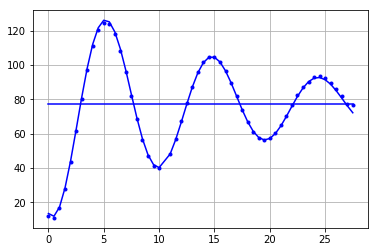

In [9]:
plt.plot(x,y, 'b.')
plt.plot(x,yEst,'b-')
plt.plot(x,y0+0.*x,'b')
plt.grid()